In [146]:
import pandas as pd
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Markdown, display
def printmd(string):
    display(Markdown(string))
%matplotlib inline


## Load data from Github

In [147]:
def str_to_float(s):
    try:
        # Parse strings with decimal (,) separators
        return float(s.replace(',','.')) if type(s) == str else s
    except ValueError:
        return None

def str_to_date(s):
    try:
        # Parse dates
        return datetime.strptime(s,'%Y-%m-%d') if type(s) == str else s
    except ValueError:
        return None

In [148]:
url = 'https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv'

covid_data_df = pd.read_csv(
    url,
    converters={'total_deaths_per_million': str_to_float,
                'date': str_to_date
               },
    low_memory=False
)

## Select countries

In [149]:
countries = [
'Finland',
'France',
'Germany',
'Italy',
'Portugal',
'Spain',
'Sweden',
'Switzerland',
'United Kingdom'
]

countries = [
'France'
]

covid_data_df = covid_data_df[covid_data_df['location'].isin(countries)]

In [150]:
lockdown_list = [
{
        'name': 'First Lockdown',
        'start_date': datetime.strptime('03/17/2020','%m/%d/%Y'),
        'end_date': datetime.strptime('05/10/2020','%m/%d/%Y'),
        'color': 'red'
    },{
        'name': 'Second Lockdown',
        'start_date': datetime.strptime('10/30/2020','%m/%d/%Y'),
        'end_date': datetime.strptime('12/14/2020','%m/%d/%Y'),
        'color': 'red'
    },{
        'name': 'Couvre feu 20h',
        'start_date': datetime.strptime('10/17/2020','%m/%d/%Y'),
        'end_date': datetime.strptime('10/30/2020','%m/%d/%Y'),
        'color': 'orange'
    },{
        'name': 'Couvre feu 20h',
        'start_date': datetime.strptime('12/14/2020','%m/%d/%Y'),
        'end_date': datetime.strptime('03/18/2021','%m/%d/%Y'),
        'color': 'orange'
    },{
        'name': 'Third Lockdown',
        'start_date': datetime.strptime('03/18/2021','%m/%d/%Y'),
        'end_date': datetime.strptime('03/22/2021','%m/%d/%Y'),
        'color': 'red'
    }
]

## Current state of affairs

Below are the last daily death toll and new case

In [152]:
most_recent_date = covid_data_df['date'].max()
covid_data_df[covid_data_df['date']==most_recent_date]

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
25397,FRA,Europe,France,2021-03-21,4277786.0,603.0,20844.571,92119.0,0.0,219.429,...,38605.671,NaN,86.06,4.77,30.1,35.6,NaN,5.98,82.66,0.901


### New Case

In [153]:
printmd('**' + str(covid_data_df[covid_data_df['date']==most_recent_date]['new_cases'].to_numpy()[0]) + ' new cases**')

**603.0 new cases**

### New Case smoothed

In [154]:
printmd('**' + str(covid_data_df[covid_data_df['date']==most_recent_date]['new_cases_smoothed'].to_numpy()[0]) + ' new cases smoothed**')

**20844.571 new cases smoothed**

### New death

In [155]:
printmd('**' + str(covid_data_df[covid_data_df['date']==most_recent_date]['new_deaths'].to_numpy()[0]) + ' new death**')

**0.0 new death**

### New death smoothed

In [156]:
printmd('**' + str(covid_data_df[covid_data_df['date']==most_recent_date]['new_deaths_smoothed'].to_numpy()[0]) + ' new death smoothed**')

**219.429 new death smoothed**

## Lastest data points

In [157]:
covid_data_df.sort_values(by="date", ascending=[False]).head(5)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
25397,FRA,Europe,France,2021-03-21,4277786.0,603.0,20844.571,92119.0,0.0,219.429,...,38605.671,NaN,86.06,4.77,30.1,35.6,NaN,5.98,82.66,0.901
25396,FRA,Europe,France,2021-03-20,4277183.0,35038.0,24522.286,92119.0,286.0,249.000,...,38605.671,NaN,86.06,4.77,30.1,35.6,NaN,5.98,82.66,0.901
25395,FRA,Europe,France,2021-03-19,4242145.0,172.0,23772.857,91833.0,0.0,232.286,...,38605.671,NaN,86.06,4.77,30.1,35.6,NaN,5.98,82.66,0.901
25394,FRA,Europe,France,2021-03-18,4241973.0,35061.0,27345.000,91833.0,422.0,264.143,...,38605.671,NaN,86.06,4.77,30.1,35.6,NaN,5.98,82.66,0.901
25393,FRA,Europe,France,2021-03-17,4206912.0,38501.0,26354.714,91411.0,87.0,243.429,...,38605.671,NaN,86.06,4.77,30.1,35.6,NaN,5.98,82.66,0.901


## Plot death and cases against lockdowns

The <span style="color:red">red</span> curve is the number of death
The <span style="color:blue">blue</span> curve is the number of cases

<span style="color:red">Red</span> areas correspond to the "complete" lockdowns, while <span style="color:orange">orange</span> one match curfews.

In [160]:
def plot_serie():
    plt.rcParams['figure.figsize'] = [12, 10]
    plt.rcParams['figure.dpi'] = 200

    # fig = plt.figure()
    # fig.suptitle('Death per million', fontsize=15)
    
    fig, ax = plt.subplots()
    for lockdown in lockdown_list:
        ax.axvspan(lockdown['start_date'], lockdown['end_date'], alpha=0.3, color=lockdown['color'])

    for key, grp in covid_data_df.groupby(['location']): 
        ax.set_xlabel('Date')
        ax.set_ylabel('new_deaths_smoothed', color='red')
        ax.plot(grp['date'], grp['new_deaths_smoothed'], color='red')
        ax.tick_params(axis='y', labelcolor='red')
        
        ax2 = ax.twinx()
        
        ax2.set_ylabel('new_cases_smoothed', color='blue')
        ax2.plot(grp['date'], grp['new_cases_smoothed'], color='blue')
        ax2.tick_params(axis='y', labelcolor='blue')

    
    fig.tight_layout()
    plt.xlabel('Date', fontsize=16)

    plt.show()

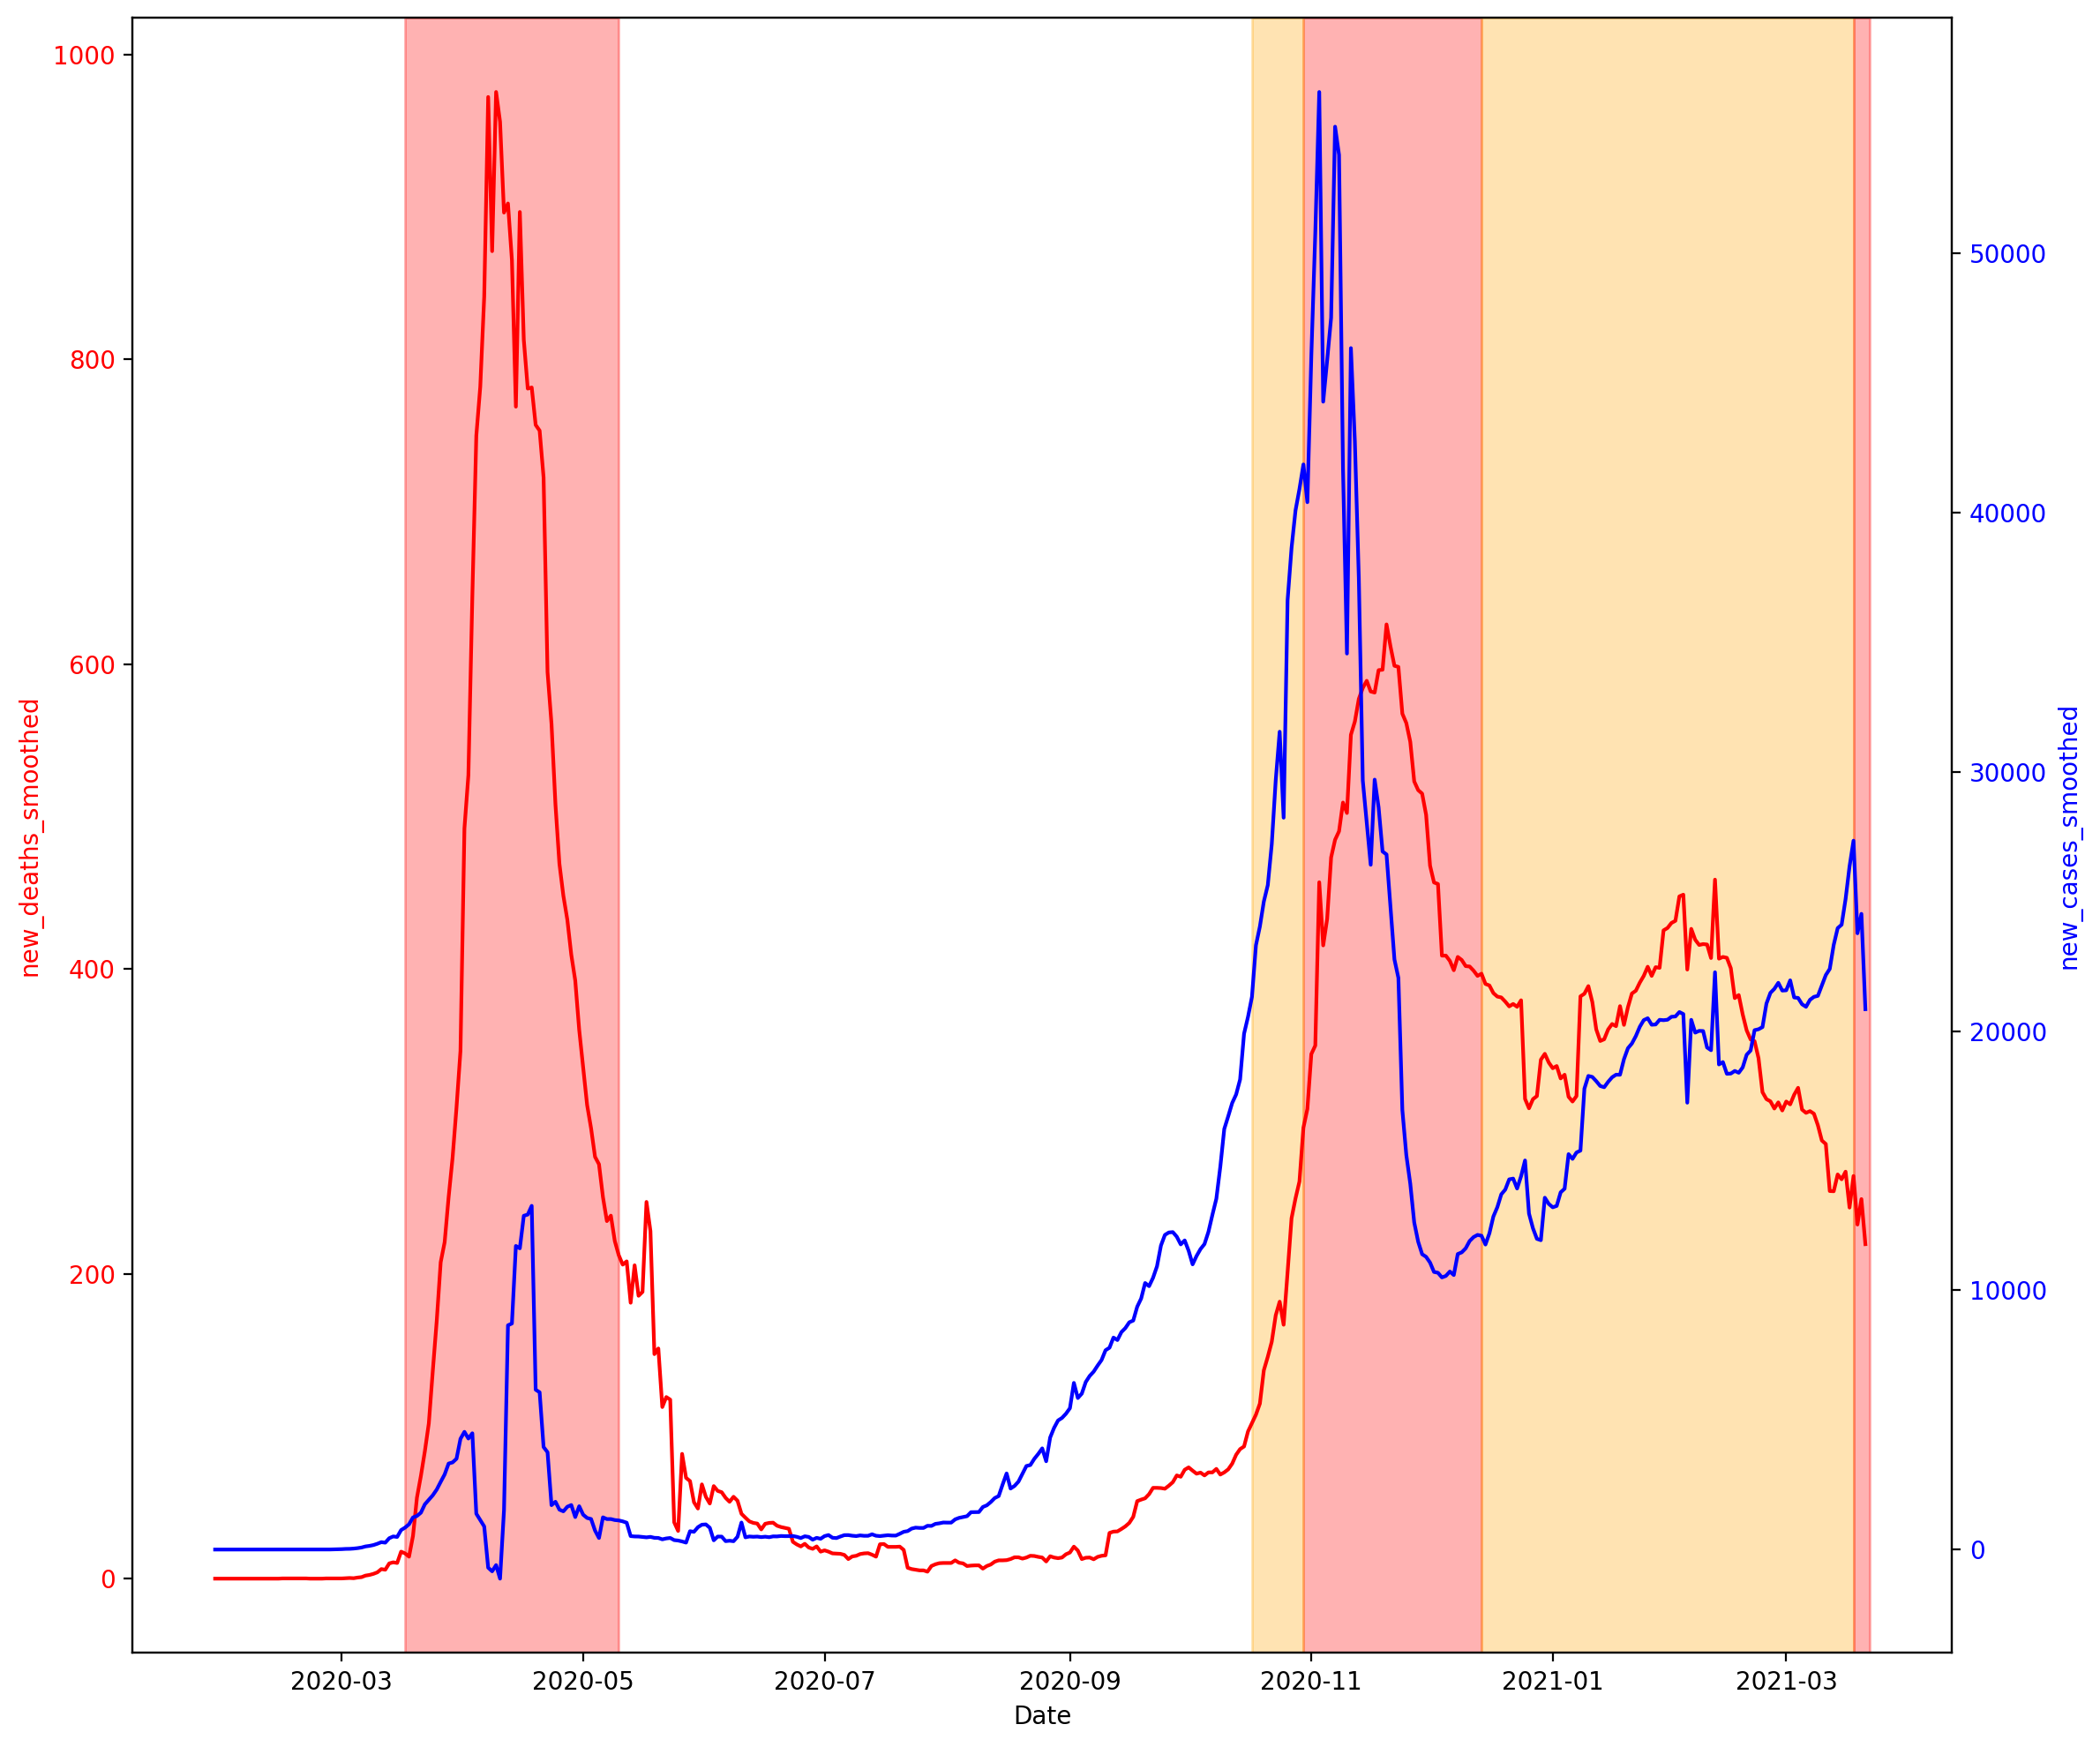

In [161]:
plot_serie()

## Plot all death and cases

The <span style="color:red">red</span> curve is the total number of death
The <span style="color:blue">blue</span> curve is the total number of case

<span style="color:red">Red</span> areas correspond to the complete lockdowns, while <span style="color:orange">orange</span> one match curfews.

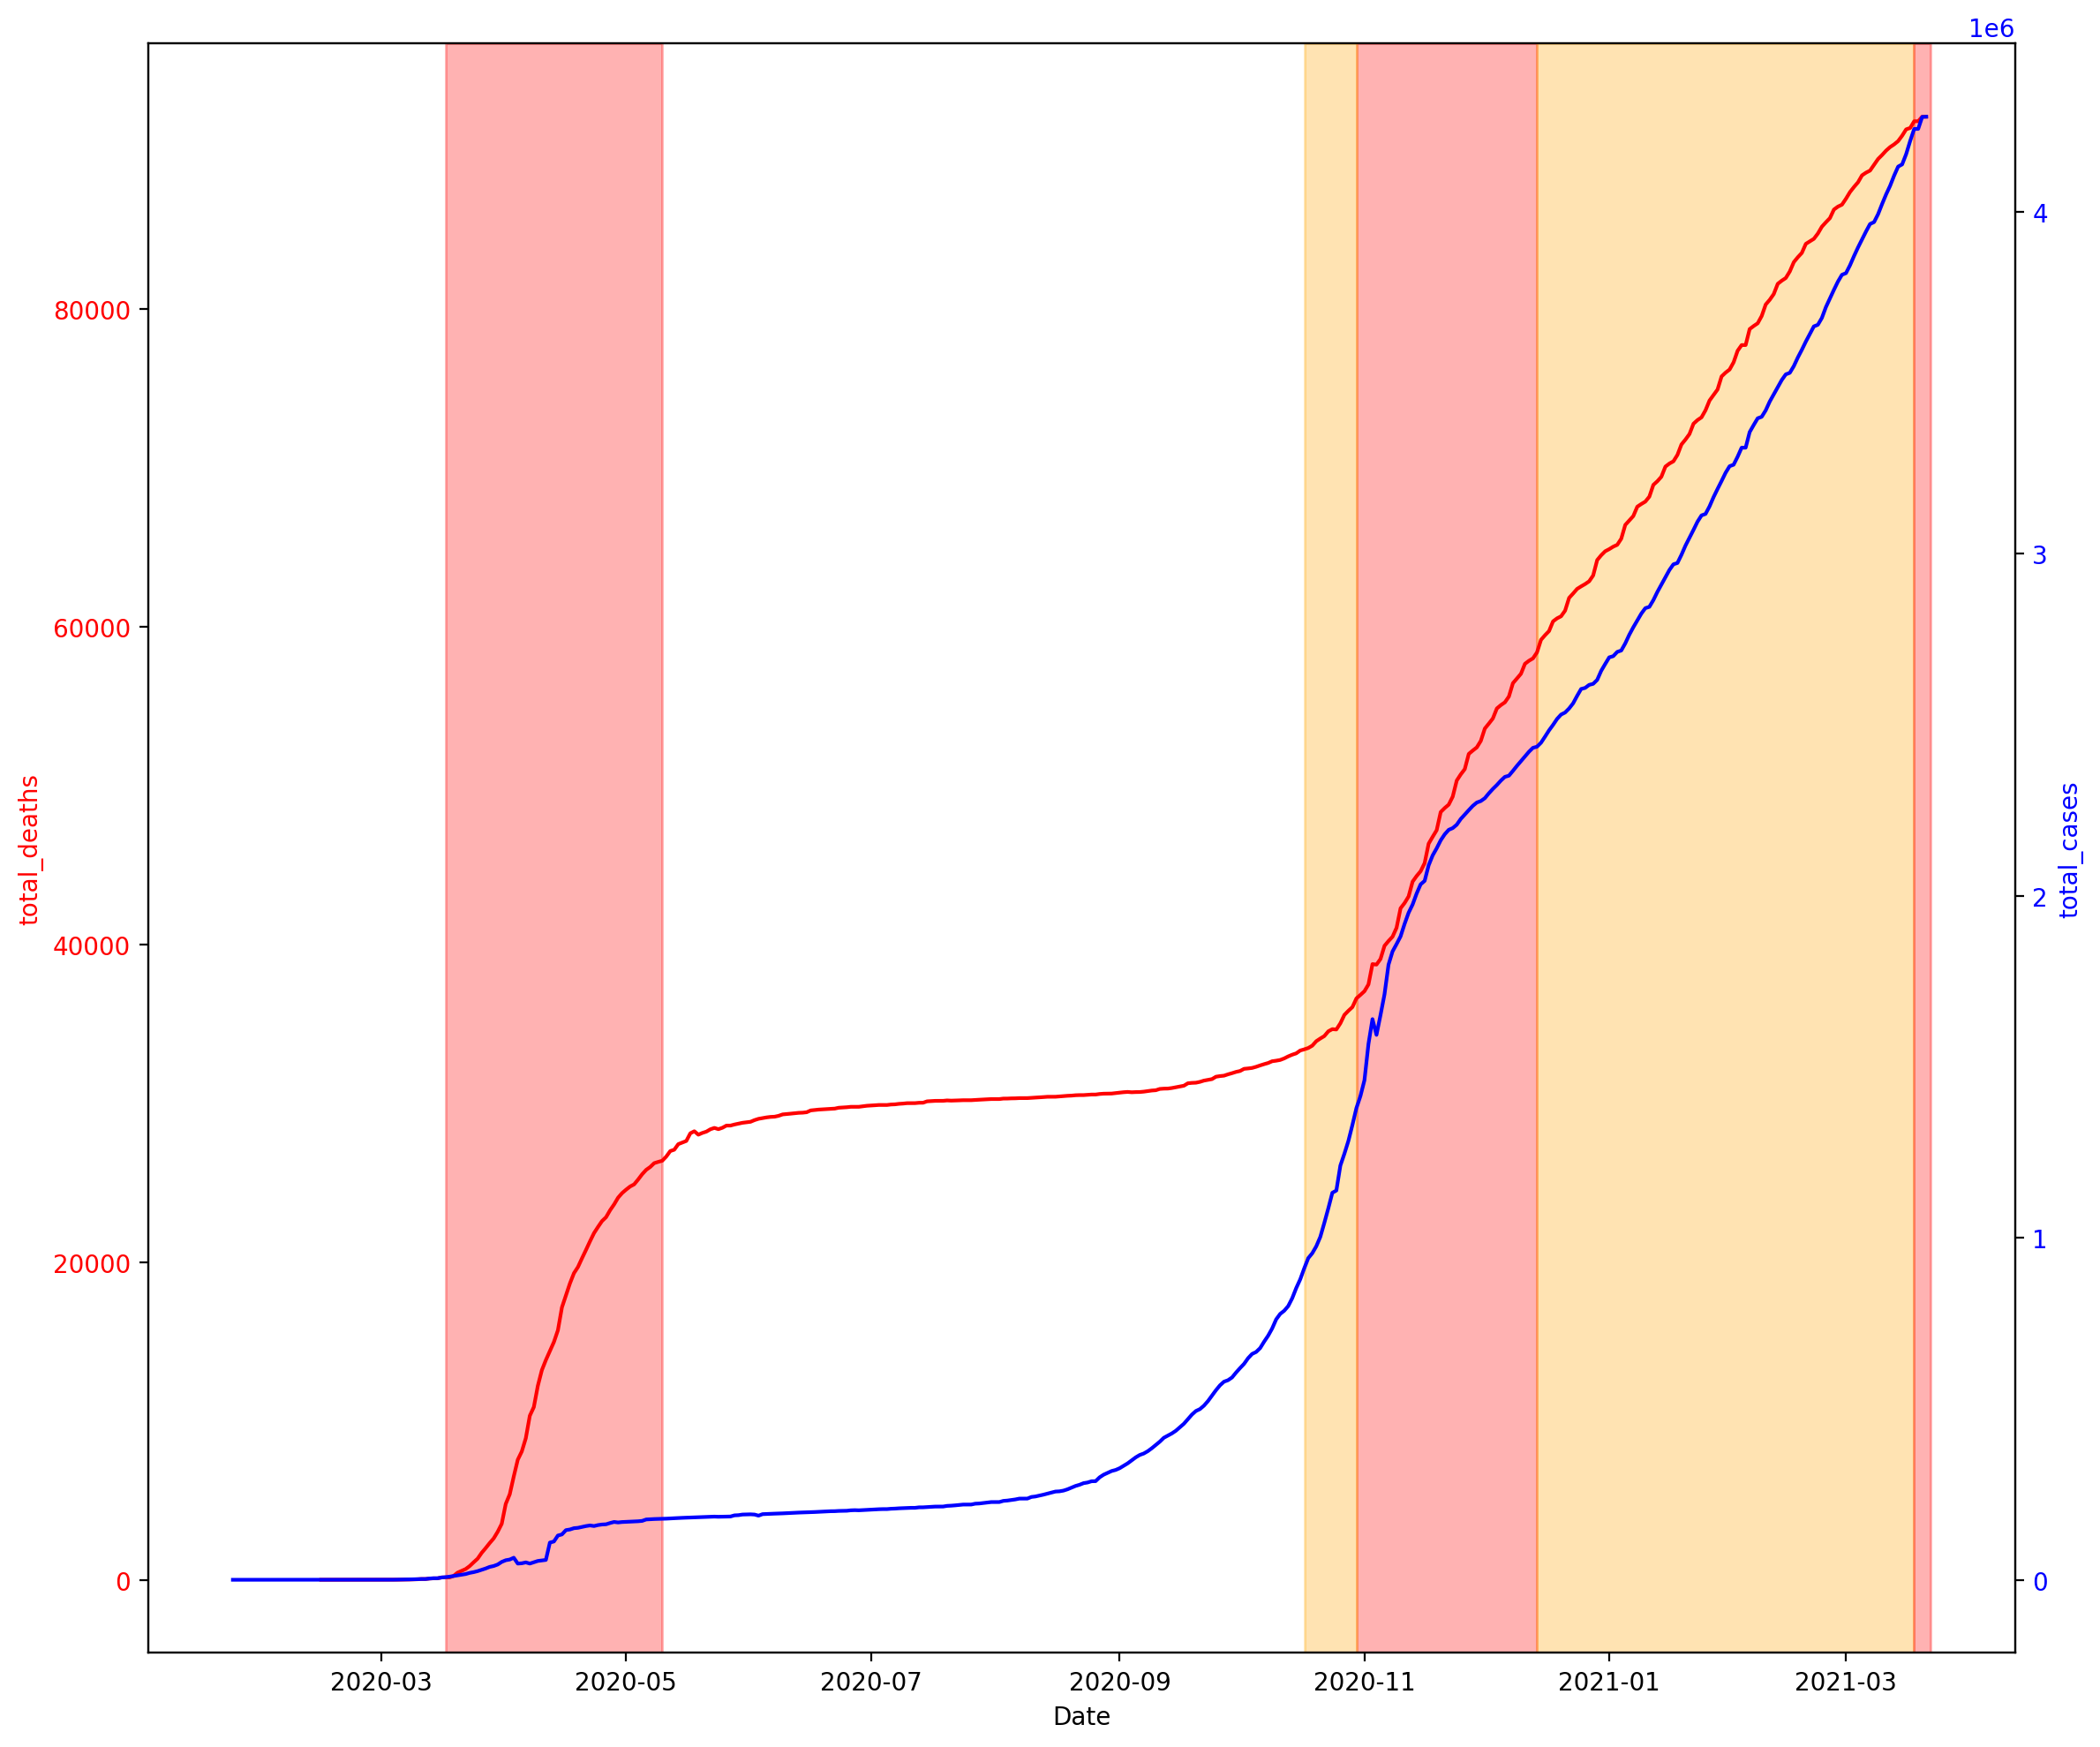

In [159]:
    plt.rcParams['figure.figsize'] = [12, 10]
    plt.rcParams['figure.dpi'] = 200

    # fig = plt.figure()
    # fig.suptitle('Death per million', fontsize=15)
    
    fig, ax = plt.subplots()
    for lockdown in lockdown_list:
        ax.axvspan(lockdown['start_date'], lockdown['end_date'], alpha=0.3, color=lockdown['color'])

    for key, grp in covid_data_df.groupby(['location']): 
        ax.set_xlabel('Date')
        ax.set_ylabel('total_deaths', color='red')
        ax.plot(grp['date'], grp['total_deaths'], color='red')
        ax.tick_params(axis='y', labelcolor='red')
        
        ax2 = ax.twinx()
        
        ax2.set_ylabel('total_cases', color='blue')
        ax2.plot(grp['date'], grp['total_cases'], color='blue')
        ax2.tick_params(axis='y', labelcolor='blue')

    
    fig.tight_layout()
    plt.xlabel('Date', fontsize=16)

    plt.show()